<a href="https://colab.research.google.com/github/achintha-eknayake/SMS-spam-detection/blob/main/SpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk

In [2]:
#lantin-1 to handle encoding sheme
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#data frame size
df.shape

(5572, 5)

In [5]:
#drop unneccecery coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
#rename coloumns to a readable format
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)
#random five data samples
df.sample(5)

,class,sms
3552,ham,Din i tell u jus now 420
176,ham,U still going to the mall?
4439,ham,I've got it down to a tea. not sure which flavour
916,ham,Was actually about to send you a reminder toda...
4270,spam,Natalja (25/F) is inviting you to be her frien...


In [8]:
#Group email by class
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [9]:
#remove duplicate emails
df = df.drop_duplicates(keep='first')

In [10]:
# duplicates (frq) = 0
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

Data visualization

In [11]:
#compute the length of sms
df["Length"] = df['sms'].apply(len)

In [12]:
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

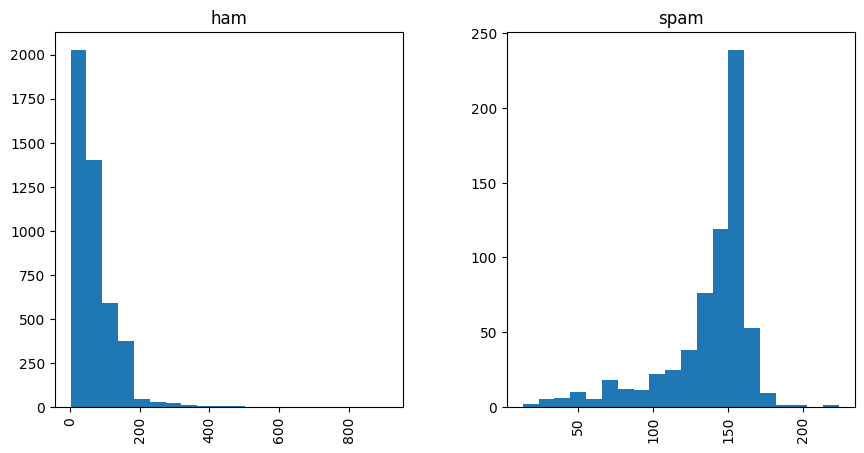

In [13]:
#visualize how dataset looks like
df.hist(column='Length',by='class',bins=20,figsize=(10,5))

Preprocessing

In [23]:
#stemming
from nltk.stem.porter import PorterStemmer

#import stop words available in nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
#verify punkt download
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')
nltk.download('punkt', download_dir='./nltk_data')
nltk.data.path.append('./nltk_data')


[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
import string

def clean_text(text):
    #remove punctuation
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [37]:
#for each sms clean function is applied
df['sms_cleaned'] = df['sms'].apply(clean_text)

In [38]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


Feature extraction  

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# number of features / vocabulary size
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [42]:
X.shape

(5169, 3000)

In [43]:
Y = df['class'].values

Learning

In [44]:
from sklearn.model_selection import train_test_split
#20% used for training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [46]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9709864603481625